# Two Traveling Salespeople

Points: 10

## Two-person Version of the [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

* __Goal:__ Find the two tours which collectively visit each of $n$ cities exactly once and return back to the same starting city. Given are pairwise distances between cities, where $d_{i,j}$ is the distance from city $i$ to city $j$.

* __State space:__ Each state represents a pair of tours, where the first element of the pair are the cities to visit for the first person and the second element are the cities to visit for the second person. The cities are numbered and the tours can be expressed a pair of vectors $(\pi_1, \pi_2)$ with the order in which the cities are visited. That is, $\pi_i(1)$ is the index of the first city to visit by the $i$th person ($i$ either is 1 or 2), $\pi_i(2)$ the index of the second city to visit by the $i$th person, and so on.

* __Objective function:__ Minimize the maximum tour length for both people. Informally, the cities should be divided up roughly evenly between the two people so that neither one has a tour that is too long.

The optimization problem is to find the optimal pair of tours $\pi_1^*$ and $\pi_2^*$ through the $n$ cities and which return to the start cities of each tour:

  > minimize: $\max(\mathrm{tourlength}(\pi_1), \mathrm{tourlength}(\pi_2))$
  where $\mathrm{tourlength}(\pi_i) = d_{\pi_i(n),\pi_i(1)} + \sum_{j = 1}^{n-1} d_{\pi_i(j),\pi_i(j+1)}$
  >
  > subject to: every city must be visited exactly once


## Helper functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

np.set_printoptions(precision=2)

np.random.seed(0) # make the results repeatable

C:\Users\zacma\AppData\Local\Temp\ipykernel_93088\436667819.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def random_tour_pair(n):
    """Create two random tours with n cities"""

    tour = list(range(n))
    np.random.shuffle(tour)

    split_index = np.random.randint(1, n) #Modified to not split at edges so each tour has >= 1
    tour1 = tour[:split_index]
    tour2 = tour[split_index:]

    return tour1, tour2

random_tour_pair(10)

([2, 8, 4, 9, 1], [6, 7, 3, 0, 5])

In [3]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def random_tsp(n):
    """
    Create a random (Euclidean) traveling salesman problem. Choose n points randomly in a 1 x 1 unit square and calulates a
    pairwise Euclidean distance matrix.
    """

    pos = pd.DataFrame({
        "x" : np.random.uniform(size = n),
        "y" : np.random.uniform(size = n)
    })

    dist = squareform(pdist(pos))

    return({"pos": pos, "dist": dist})

tsp = random_tsp(10)

print(f"Positions:\n{tsp['pos']}")
print(f"Distance matrix:\n{pd.DataFrame(tsp['dist'])})")

Positions:
          x         y
0  0.297535  0.368242
1  0.056713  0.957155
2  0.272656  0.140351
3  0.477665  0.870087
4  0.812169  0.473608
5  0.479977  0.800911
6  0.392785  0.520477
7  0.836079  0.678880
8  0.337396  0.720633
9  0.648172  0.582020
Distance matrix:
          0         1         2         3         4         5         6  \
0  0.000000  0.636250  0.229245  0.533194  0.525310  0.469561  0.179578   
1  0.636250  0.000000  0.844867  0.429862  0.896957  0.451182  0.551028   
2  0.229245  0.844867  0.000000  0.757987  0.634140  0.692330  0.398657   
3  0.533194  0.429862  0.757987  0.000000  0.518737  0.069215  0.359766   
4  0.525310  0.896957  0.634140  0.518737  0.000000  0.466346  0.421995   
5  0.469561  0.451182  0.692330  0.069215  0.466346  0.000000  0.293676   
6  0.179578  0.551028  0.398657  0.359766  0.421995  0.293676  0.000000   
7  0.621712  0.827556  0.779396  0.406227  0.206659  0.376431  0.470745   
8  0.354638  0.367050  0.583882  0.204968  0.535192  0.

In [4]:
def tour_pair_max_length(tsp, tour_pair):
   """Calculate the maximum length of a pair of tours, i.e., the objective function."""

   tour0_len = tour_length(tsp, tour_pair[0])
   tour1_len = tour_length(tsp, tour_pair[1])

   return max(tour0_len, tour1_len)

def tour_length(tsp, tour):
    """Caclulate the length of a single tour"""

    # make sure tour is a Python list (not an array or a numpy.array)
    if not isinstance(tour, list): tour = tour.tolist()

    tl = 0
    dist = tsp["dist"]

    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]

    tl += dist[tour[-1], tour[0]]

    return(tl)

np.random.seed(0) # make the results repeatable
tour_pair = random_tour_pair(10)
#Added to check
print(tour_pair)
print(f"objective value: {tour_pair_max_length(tsp, tour_pair)}")

([2, 8, 4, 9, 1], [6, 7, 3, 0, 5])
objective value: 2.8609251884702456


Tour length (red): 2.86
Tour length (blue): 2.17


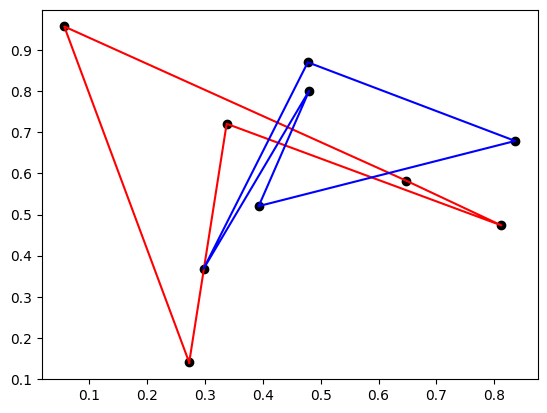

In [5]:
def show_2tsp(tsp, tour_pair = None):
    """display the twoperson traveling salesman problem and a tour pair."""

    pos = tsp["pos"]

    plt.scatter(pos["x"], pos["y"], color='black')

    if tour_pair is not None:
      colors = ['red', 'blue']

      for tour, color in zip(tour_pair, colors):
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): tour = tour.tolist()

        print(f"Tour length ({color}): {round(tour_length(tsp, tour), 2)}")
        tour_x_list = [pos.loc[i, 'x'] for i in tour]
        tour_y_list = [pos.loc[i, 'y'] for i in tour]

        # wrap back to start
        tour_x_list.append(tour_x_list[0])
        tour_y_list.append(tour_y_list[0])

        plt.plot(tour_x_list, tour_y_list, color)

    plt.show()

show_2tsp(tsp, tour_pair)

## Steepest-ascent Hill Climbing Search [2 Points]

Come up with reasonable definition for local moves and explain it in text. Implement a steepest-ascent hill climbing strategy. Measure and report the performance of this on 50 random problem instances. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

In [6]:
#Our reasonable definition for a local move is a swap of cities between the two tours.
#We will check all swaps between cities and swap if better obj func 
#We will continue until no better swaps are found not going to exchange one to another

def steepestAsecent(tsp, tour_pair):
    currentBestTourPair = tour_pair
    currentBestObjectiveValue = tour_pair_max_length(tsp, tour_pair)
    totalMovesSeen = 0
    possibleBestTourPair = None
    possibleBestObj = None  

    while True:
        for i in range(len(currentBestTourPair[0])):
            for j in range(len(currentBestTourPair[1])):
                #Swap at same time to get new tour pair
                currentBestTourPair[0][i], currentBestTourPair[1][j] = currentBestTourPair[1][j], currentBestTourPair[0][i]

                newObjectiveValue = tour_pair_max_length(tsp, currentBestTourPair)
                totalMovesSeen += 1

                #If new is better swap (climb the hill)
                if newObjectiveValue < currentBestObjectiveValue :
                    if possibleBestTourPair == None: #Replace if first
                        possibleBestTourPair = (currentBestTourPair[0].copy(), currentBestTourPair[1].copy())
                        possibleBestObj = newObjectiveValue
                    elif newObjectiveValue < possibleBestObj: #Replace if better
                        possibleBestTourPair = (currentBestTourPair[0].copy(), currentBestTourPair[1].copy())
                        possibleBestObj = newObjectiveValue
                
                #Always swap back to original tour pair until random choice
                currentBestTourPair[0][i], currentBestTourPair[1][j] = currentBestTourPair[1][j], currentBestTourPair[0][i]
        
        if possibleBestTourPair == None: #No better swaps found
            break
        else: #Swap to best found
            currentBestTourPair = possibleBestTourPair
            currentBestObjectiveValue = possibleBestObj
            possibleBestTourPair = None
            possibleBestObj = None

    return (currentBestTourPair, totalMovesSeen)

#For just random tours
avgObj = []
avgMoves = []
for i in range(50):
    np.random.seed(i) # make the results repeatable
    tour_pair = random_tour_pair(10)
    totalMovesSeen = 0
    avgObj.append(tour_pair_max_length(tsp, tour_pair))
    avgMoves.append(totalMovesSeen)

print(f"Average objective value for random tours: {np.mean(avgObj)}")
print(f"Average moves for random tours: {np.mean(avgMoves)}")

avgObj = []
avgMoves = []
for i in range(50):
    np.random.seed(i) # make the results repeatable
    tour_pair = random_tour_pair(10)
    #print(tour_pair)
    tour_pair, totalMovesSeen = steepestAsecent(tsp, tour_pair)
    avgObj.append(tour_pair_max_length(tsp, tour_pair))
    avgMoves.append(totalMovesSeen)

print(f"Average objective value for steepest hill climb: {np.mean(avgObj)}")
print(f"Average moves for steepest hill climb: {np.mean(avgMoves)}")



Average objective value for random tours: 3.4184509637332625
Average moves for random tours: 0.0
Average objective value for steepest hill climb: 2.30595305413656
Average moves for steepest hill climb: 66.3


## Steepest-ascent Hill Climbing Search with Random Restarts [1 Point]

Modify the code to include random restarts once improvement is no longer possible. For a fixed problem instance, analyze the improvement in the objective function as more restarts are done. Plot the number of restarts on the x axis and the objective function on the y axis.

Tour pair: ([2, 1], [3, 0, 6, 9, 4, 7, 5, 8]), Objective value: 2.1237469954603396
Tour pair: ([2, 1], [7, 5, 3, 9, 0, 8, 6, 4]), Objective value: 2.3820300089742745
Tour pair: ([8, 9, 1, 5, 3], [0, 2, 7, 4, 6]), Objective value: 1.8168731433670444
Tour pair: ([6, 0, 2, 9, 4], [8, 3, 7, 5, 1]), Objective value: 1.8058584261660322
Tour pair: ([1], [9, 0, 2, 3, 7, 4, 6, 8, 5]), Objective value: 3.0801337229550936
Tour pair: ([0, 1, 2], [4, 6, 5, 8, 3, 7, 9]), Objective value: 1.898486772123786
Tour pair: ([2, 1], [3, 9, 7, 4, 6, 0, 8, 5]), Objective value: 1.941862251020069
Tour pair: ([4, 7, 0, 6, 8, 3, 5, 9], [1, 2]), Objective value: 1.9624503316382715
Tour pair: ([1], [3, 7, 4, 2, 5, 9, 8, 6, 0]), Objective value: 3.476142963400423
Tour pair: ([7, 9, 4, 2, 0, 8, 5, 6, 3], [1]), Objective value: 2.849313223683376


Best tour pair: ([6, 0, 2, 9, 4], [8, 3, 7, 5, 1]), Objective value: 1.8058584261660322
Tour length (red): 1.61
Tour length (blue): 1.81


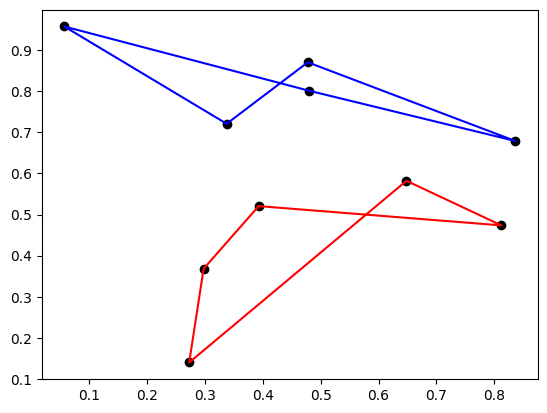

In [7]:
#Our reasonable definition for a local move is a swap of cities between the two tours.

def steepestAsecentWithRandomResarts(tsp, tour_pair, restarts):
    currentBestTourPair = []
    currentBestObjectiveValue = tour_pair_max_length(tsp, tour_pair)
    currentBestTourPair.append((tour_pair, currentBestObjectiveValue))
    totalMovesSeen = []

    possibleBestTourPair = None
    possibleBestObj = None
      
    for z in range(restarts):
        totalMovesSeen.append(0)

        if z != 0:
            tour_pair = random_tour_pair(len(tour_pair[0]) + len(tour_pair[1]))
            currentBestObjectiveValue = tour_pair_max_length(tsp, tour_pair)
            currentBestTourPair.append((tour_pair, currentBestObjectiveValue))
        while True:
            for i in range(len(currentBestTourPair[z][0][0])):
                for j in range(len(currentBestTourPair[z][0][1])):
                    #Swap at same time to get new tour pair
                    currentBestTourPair[z][0][0][i], currentBestTourPair[z][0][1][j] = currentBestTourPair[z][0][1][j], currentBestTourPair[z][0][0][i]

                    newObjectiveValue = tour_pair_max_length(tsp, currentBestTourPair[z][0])
                    totalMovesSeen[z] += 1

                    #If new is better swap (climb the hill)
                    if newObjectiveValue < currentBestObjectiveValue :
                        if possibleBestTourPair == None: #Replace if first
                            possibleBestTourPair = (currentBestTourPair[z][0][0].copy(), currentBestTourPair[z][0][1].copy())
                            possibleBestObj = newObjectiveValue
                        elif newObjectiveValue < possibleBestObj: #Replace if better
                            possibleBestTourPair = (currentBestTourPair[z][0][0].copy(), currentBestTourPair[z][0][1].copy())
                            possibleBestObj = newObjectiveValue
                    
                    #Always swap back to original tour pair until random choice
                    currentBestTourPair[z][0][0][i], currentBestTourPair[z][0][1][j] = currentBestTourPair[z][0][1][j], currentBestTourPair[z][0][0][i]
            
            if possibleBestTourPair == None: #No better swaps found
                break
            else: #Swap to best found
                currentBestTourPair[z] = (possibleBestTourPair, possibleBestObj)
                currentBestObjectiveValue = possibleBestObj
                possibleBestTourPair = None
                possibleBestObj = None
                
    return (currentBestTourPair, totalMovesSeen)

np.random.seed(i) # make the results repeatable
tour_pair = random_tour_pair(10)
tour_pair, totalMovesSeen = steepestAsecentWithRandomResarts(tsp, tour_pair, 10)

for tp, ob in tour_pair:
    print(f"Tour pair: {tp}, Objective value: {ob}")
print('\n')
bestTourPair = min(tour_pair, key=lambda x: x[1])

print(f"Best tour pair: {bestTourPair[0]}, Objective value: {bestTourPair[1]}")

show_2tsp(tsp, bestTourPair[0])
    



## Stochastic Hill Climbing [1 Point]

Implement an approach that chooses randomly from among all uphill moves. Measure and report the performance of this on the same 50 random problem instances as was done earlier. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

In [8]:
def stochasticHillClimb(tsp, tour_pair):
    currentBestTourPair = tour_pair
    currentBestObjectiveValue = tour_pair_max_length(tsp, tour_pair)
    totalMovesSeen = 0
    possibleBestTourPairs = []  

    while True:
        for i in range(len(tour_pair[0])):
            for j in range(len(tour_pair[1])):
                #Swap at same time to get new tour pair
                currentBestTourPair[0][i], currentBestTourPair[1][j] = currentBestTourPair[1][j], currentBestTourPair[0][i]

                newObjectiveValue = tour_pair_max_length(tsp, currentBestTourPair)
                totalMovesSeen += 1

                #If new is better swap (climb the hill)
                if newObjectiveValue < currentBestObjectiveValue:
                    possibleBestTourPairs.append(((currentBestTourPair[0].copy(),currentBestTourPair[1].copy()), newObjectiveValue))

                #Always swap back to original tour pair until random choice
                currentBestTourPair[0][i], currentBestTourPair[1][j] = currentBestTourPair[1][j], currentBestTourPair[0][i]
        
        if len(possibleBestTourPairs) == 0: #Nothing better
            break
        else:
            #Randomly choose a better tour pair
            choice = np.random.choice(len(possibleBestTourPairs))
            currentBestTourPair = possibleBestTourPairs[choice][0]
            currentBestObjectiveValue = possibleBestTourPairs[choice][1]
            possibleBestTourPairs = []

    return (currentBestTourPair, totalMovesSeen)


avgObj = []
avgMoves = []
for i in range(50):
    np.random.seed(i) # make the results repeatable
    tour_pair = random_tour_pair(10)
    #print(tour_pair)
    tour_pair, totalMovesSeen = stochasticHillClimb(tsp, tour_pair)
    #print(tour_pair)
    avgObj.append(tour_pair_max_length(tsp, tour_pair))
    avgMoves.append(totalMovesSeen)

print(f"Average objective value for steepest hill climb: {np.mean(avgObj)}")
print(f"Average moves for steepest hill climb: {np.mean(avgMoves)}")

Average objective value for steepest hill climb: 2.374175791196711
Average moves for steepest hill climb: 107.84


## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state. Implement this and report the performance of on 50 the same random problem instances. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

In [9]:
def firstChoiceHillClimb(tsp, tour_pair):
    currentBestTourPair = tour_pair
    currentBestObjectiveValue = tour_pair_max_length(tsp, tour_pair)
    totalMovesSeen = 0
    

    while True:
        newBestFound = False
        for i in range(len(tour_pair[0])):
            for j in range(len(tour_pair[1])):
                #Swap at same time to get new tour pair
                currentBestTourPair[0][i], currentBestTourPair[1][j] = currentBestTourPair[1][j], currentBestTourPair[0][i]

                newObjectiveValue = tour_pair_max_length(tsp, currentBestTourPair)
                totalMovesSeen += 1

                #If new is better swap (climb the hill)
                if newObjectiveValue < currentBestObjectiveValue:
                    currentBestObjectiveValue = newObjectiveValue
                    newBestFound = True
                    break

                #Always swap back to original tour pair until random choice
                currentBestTourPair[0][i], currentBestTourPair[1][j] = currentBestTourPair[1][j], currentBestTourPair[0][i]
            if newBestFound == True:
                break
        if newBestFound == False: 
            break


    return (currentBestTourPair, totalMovesSeen)


avgObj = []
avgMoves = []
for i in range(50):
    np.random.seed(i) # make the results repeatable
    tour_pair = random_tour_pair(10)
    #print(tour_pair)
    tour_pair, totalMovesSeen = firstChoiceHillClimb(tsp, tour_pair)
    #print(tour_pair)
    avgObj.append(tour_pair_max_length(tsp, tour_pair))
    avgMoves.append(totalMovesSeen)

print(f"Average objective value for steepest hill climb: {np.mean(avgObj)}")
print(f"Average moves for steepest hill climb: {np.mean(avgMoves)}")

Average objective value for steepest hill climb: 2.3995818738260333
Average moves for steepest hill climb: 51.96


## Simulated Annealing [1 Point]

Implement an algorithm that uses simulated annealing to solve the problem, as described in the lectures and book (Section 4.1.2). Experiment with hyperparameters like the temperature schedule and thresholds until you find values that work well.

In [10]:
def simulatedAnnealing(tsp, tour_pair, alpha, Tzero, epsilon):
    currentBestTourPair = tour_pair
    currentBestObjectiveValue = tour_pair_max_length(tsp, tour_pair)
    totalMovesSeen = 0
    newBestFound = False

    while Tzero > epsilon:
        for i in range(len(tour_pair[0])):
            for j in range(len(tour_pair[1])):
                #Swap at same time to get new tour pair
                currentBestTourPair[0][i], currentBestTourPair[1][j] = currentBestTourPair[1][j], currentBestTourPair[0][i]

                newObjectiveValue = tour_pair_max_length(tsp, currentBestTourPair)
                totalMovesSeen += 1

                Tchange = newObjectiveValue - currentBestObjectiveValue

                #If new is better swap (climb the hill)
                if Tchange < 0 or np.random.rand() < np.exp(-Tchange/Tzero): 
                    currentBestObjectiveValue = newObjectiveValue
                    newBestFound = True
                    break

                #Always swap back to original tour pair until random choice
                currentBestTourPair[0][i], currentBestTourPair[1][j] = currentBestTourPair[1][j], currentBestTourPair[0][i]
            if newBestFound == True:
                break
        Tzero = alpha * Tzero

    return (currentBestTourPair, totalMovesSeen)

avgObj = []
avgMoves = []
for i in range(50):
    np.random.seed(i) # make the results repeatable
    tour_pair = random_tour_pair(10)
    #print(tour_pair)
    tour_pair, totalMovesSeen = simulatedAnnealing(tsp, tour_pair, 0.95, 50, 0.001)
    #print(tour_pair)
    avgObj.append(tour_pair_max_length(tsp, tour_pair))
    avgMoves.append(totalMovesSeen)

print(f"Average objective value for steepest hill climb: {np.mean(avgObj)}")
print(f"Average moves for steepest hill climb: {np.mean(avgMoves)}")

Average objective value for steepest hill climb: 2.7867608698317974
Average moves for steepest hill climb: 554.9


## Compare Performance [1 Point]

Compare simulated annealing with random restarts and stochastic hill climbing. Analyze which algorithm is better for 10 cities, 20 cities, and 50 cities. To make the comparison fair, try to ensure the time taken for each approach is roughly the same.

For timing you can use the `time` package.

In [11]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

Do something
This took: 0.0 milliseconds


In [12]:
import time

#10
np.random.seed(0)
tsp10 = random_tsp(10)

#20
np.random.seed(0)
tsp20 = random_tsp(20)

#50
np.random.seed(0)
tsp50 = random_tsp(50)


t0 = time.time()

#10
np.random.seed(0)
tour_pair = random_tour_pair(10)
tour_pair, totalMovesSeen = simulatedAnnealing(tsp10, tour_pair, 0.95, 50, 0.001)
print(f"Tour pair: {tour_pair}, Objective value: {tour_pair_max_length(tsp10, tour_pair)} for 10 cities")

#20
np.random.seed(0)
tour_pair = random_tour_pair(20)
tour_pair, totalMovesSeen = simulatedAnnealing(tsp20, tour_pair, 0.95, 50, 0.001)
print(f"Tour pair: {tour_pair}, Objective value: {tour_pair_max_length(tsp20, tour_pair)} for 20 cities")

#50
np.random.seed(0)
tour_pair = random_tour_pair(50)
tour_pair, totalMovesSeen = simulatedAnnealing(tsp50, tour_pair, 0.95, 50, 0.001)
print(f"Tour pair: {tour_pair}, Objective value: {tour_pair_max_length(tsp50, tour_pair)} for 50 cities")

t1 = time.time()

print(f"Simulated Annealing took: {(t1-t0) * 1e3} milliseconds")

t0 = time.time()
#10
np.random.seed(0)
tour_pair = random_tour_pair(10)
tour_pair, totalMovesSeen = stochasticHillClimb(tsp10, tour_pair)
print(f"Tour pair: {tour_pair}, Objective value: {tour_pair_max_length(tsp10, tour_pair)} for 10 cities")

#20
np.random.seed(0)
tour_pair = random_tour_pair(20)
tour_pair, totalMovesSeen = stochasticHillClimb(tsp20, tour_pair)
print(f"Tour pair: {tour_pair}, Objective value: {tour_pair_max_length(tsp20, tour_pair)} for 20 cities")

#50
np.random.seed(0)
tour_pair = random_tour_pair(50)
tour_pair, totalMovesSeen = stochasticHillClimb(tsp50, tour_pair)
print(f"Tour pair: {tour_pair}, Objective value: {tour_pair_max_length(tsp50, tour_pair)} for 50 cities")

t1 = time.time()

print(f"Stochastic Hill Climb took: {(t1-t0) * 1e3} milliseconds")

Tour pair: ([7, 8, 4, 9, 1], [6, 3, 0, 2, 5]), Objective value: 2.6070736143733506 for 10 cities
Tour pair: ([14, 1, 19, 8, 10, 17, 6], [2, 9, 4, 5, 13, 7, 18, 16, 11, 3, 0, 15, 12]), Objective value: 4.5754572568149525 for 20 cities
Tour pair: ([14], [35, 45, 42, 28, 33, 2, 22, 48, 41, 31, 7, 10, 11, 29, 26, 30, 34, 43, 16, 15, 9, 4, 38, 18, 17, 27, 8, 13, 25, 5, 32, 40, 49, 1, 12, 37, 24, 6, 23, 36, 21, 19, 20, 39, 46, 3, 0, 47, 44]), Objective value: 16.197605246172472 for 50 cities
Simulated Annealing took: 49.99995231628418 milliseconds
Tour pair: ([1, 2, 4, 6, 5], [7, 0, 9, 3, 8]), Objective value: 1.3659939298814452 for 10 cities
Tour pair: ([14, 4, 9, 12, 15, 16, 6], [13, 10, 2, 5, 19, 8, 17, 1, 11, 3, 0, 18, 7]), Objective value: 2.7072374141116082 for 20 cities
Tour pair: ([22], [45, 10, 13, 27, 19, 1, 33, 2, 12, 6, 46, 26, 40, 21, 31, 7, 42, 11, 29, 15, 30, 32, 34, 24, 16, 43, 48, 41, 36, 0, 9, 4, 28, 5, 25, 37, 44, 17, 23, 38, 8, 20, 18, 39, 35, 3, 14, 47, 49]), Objective v

## Tour US States [3 points]

Take your best performing approach for 50 cities and try to find the minimum objective value for a modified version of the two salesman problem going around the 48 lower US states. The modification is that both tours must start and end in New York. New York is the only state shared between the two tours.

Each state is considered visited if you can get to its centroid and it is assumed straight line distances between centroids based on GPS coordinates is the way we want to measure distances.

Plot the minimum objective value 2-tsp tours that you find in red and blue, like was done before for the randomly generated points. Print the length of the best tours, as well as the list of indices corresponding to states (Louisiana=0, Maryland=1, ... , see code below).

Loaded from states.pkl
[('Louisiana', 773189.1979394462, -1515002.3775255599), ('Maryland', 1979094.092929626, -383219.5841403234), ('Wisconsin', 789405.1598855288, 7178.093118233481), ('Florida', 1716480.219180179, -1645210.600897307), ('Georgia', 1548181.656913751, -1221152.9272859306), ('Tennessee', 1227400.61029946, -915322.7518723848), ('Minnesota', 437251.5679414954, 158022.46844123024), ('Iowa', 536318.2702880218, -303823.8620393787), ('Missouri', 657464.3949930622, -708334.247200498), ('Michigan', 1154374.0876788225, 31062.85040658865), ('Idaho', -1153546.3198592355, 32306.32235855231), ('California', -1708049.2747510816, -667730.6252787699), ('Connecticut', 2216157.759584861, -1386.5813699768994), ('Texas', 66673.11730108199, -1502504.3982431917), ('Virginia', 1848871.780566166, -594407.8114616701), ('New York', 1957067.0071638976, 68085.33717547411), ('Illinois', 917185.1983259172, -491248.5973706354), ('Montana', -727314.0192655415, 271896.71285768476), ('Kentucky', 1290485.

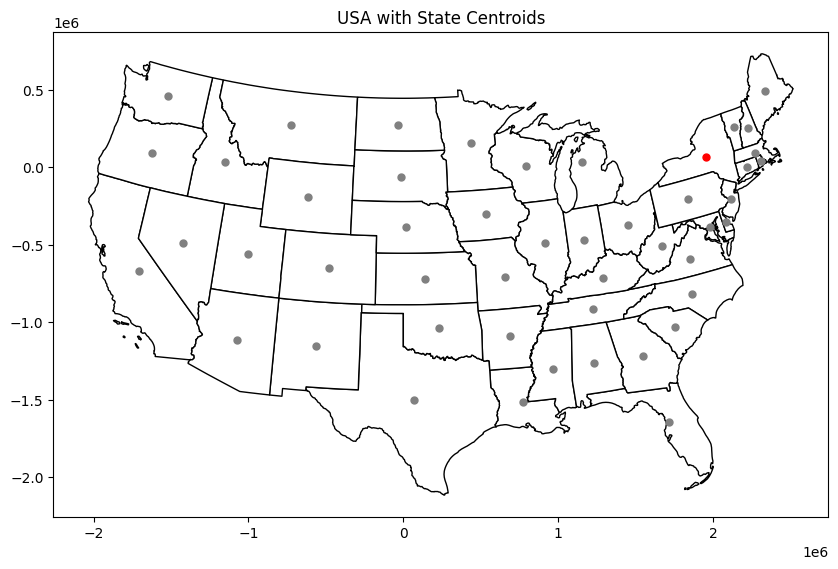

In [13]:
import geopandas as gpd

def get_state_centroids():

    # load pickled data from states.pkl if it exists
    try:
        states = pd.read_pickle('states.pkl')
        print('Loaded from states.pkl')
    except:
        states = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip')

        # pickle (save) the data to states.pkl so we don't need to download in the future
        states.to_pickle('states.pkl')

        print('Downloaded data and saved to states.pkl')

    # Filter out Alaska, Hawaii, and territories
    contiguous_usa = states[~states['STUSPS'].isin(['AK', 'HI', 'PR', 'GU', 'VI', 'MP', 'AS', 'DC'])]

    # Get centroid data
    contiguous_usa = contiguous_usa.to_crs(epsg=2163)
    centroids = contiguous_usa.geometry.centroid
    contiguous_usa['centroid_lon'] = centroids.x
    contiguous_usa['centroid_lat'] = centroids.y

    # Create tuples (state name, x-coordinate, y-coordinate)
    state_tuples = list(zip(contiguous_usa['NAME'], centroids.x, centroids.y))

    return contiguous_usa, state_tuples

def draw_contiguous_usa_map_with_centroids():
    contiguous_usa, state_tuples = get_state_centroids()

    print(state_tuples)
    print(len(state_tuples))

    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    contiguous_usa.plot(ax=ax, color='white', edgecolor='black')

    # Plot centroids
    for statename, x, y in state_tuples:
        color = 'red' if statename == 'New York' else 'grey'
        plt.plot(x, y, marker='o', color=color, markersize=5)

    plt.title("USA with State Centroids")
    plt.show()

draw_contiguous_usa_map_with_centroids()



---
Assignment adapted from [Michael Hahsler](https://github.com/mhahsler/CS7320-AI) under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/deed.en) license.


In [14]:
def show_2tsp_usa( state_tuples, tsp,pos, tour_pair = None,):
    """display the twoperson traveling salesman problem and a tour pair."""
    contiguous_usa, state_tuples = get_state_centroids()
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    contiguous_usa.plot(ax=ax, color='white', edgecolor='black')

    print(state_tuples)
    print(len(state_tuples))
    # Plot centroids
    for statename, x, y in state_tuples:
        color = 'red' if statename == 'New York' else 'grey'
        plt.plot(x, y, marker='o', color=color, markersize=5)

    plt.title("USA with State Centroids")


    #plt.scatter(pos["x"], pos["y"], color='black')

    if tour_pair is not None:
      colors = ['red', 'blue']

      for tour, color in zip(tour_pair, colors):
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): tour = tour.tolist()

        print(f"Tour length ({color}): {round(tour_length(tsp, tour), 2)}")
        tour_x_list = [pos.loc[i, 'x'] for i in tour]
        tour_y_list = [pos.loc[i, 'y'] for i in tour]

        # wrap back to start
        tour_x_list.append(tour_x_list[0])
        tour_y_list.append(tour_y_list[0])

        plt.plot(tour_x_list, tour_y_list, color)

    plt.show()

In [15]:
def stochastic_hill_climb_usa(tsp, tour_pair,ignore):
    currentBestTourPair = tour_pair
    currentBestObjectiveValue = tour_pair_max_length(tsp, tour_pair)
    totalMovesSeen = 0
    possibleBestTourPairs = []  

    while True:
        for i in range(len(tour_pair[0])):
            for j in range(len(tour_pair[1])):
                if (tour_pair[0][i] != ignore) and (tour_pair[1][j] != ignore):
                    #Swap at same time to get new tour pair
                    currentBestTourPair[0][i], currentBestTourPair[1][j] = currentBestTourPair[1][j], currentBestTourPair[0][i]

                    newObjectiveValue = tour_pair_max_length(tsp, currentBestTourPair)
                    totalMovesSeen += 1

                    #If new is better swap (climb the hill)
                    if newObjectiveValue < currentBestObjectiveValue:
                        possibleBestTourPairs.append(((currentBestTourPair[0].copy(),currentBestTourPair[1].copy()), newObjectiveValue))

                    #Always swap back to original tour pair until random choice
                    currentBestTourPair[0][i], currentBestTourPair[1][j] = currentBestTourPair[1][j], currentBestTourPair[0][i]
            
        if len(possibleBestTourPairs) == 0: #Nothing better
            break
        else:
            #Randomly choose a better tour pair
            choice = np.random.choice(len(possibleBestTourPairs))
            currentBestTourPair = possibleBestTourPairs[choice][0]
            currentBestObjectiveValue = possibleBestTourPairs[choice][1]
            possibleBestTourPairs = []

    return (currentBestTourPair, totalMovesSeen)

Loaded from states.pkl
position :0, state: Louisiana
position :1, state: Maryland
position :2, state: Wisconsin
position :3, state: Florida
position :4, state: Georgia
position :5, state: Tennessee
position :6, state: Minnesota
position :7, state: Iowa
position :8, state: Missouri
position :9, state: Michigan
position :10, state: Idaho
position :11, state: California
position :12, state: Connecticut
position :13, state: Texas
position :14, state: Virginia
position :15, state: New York
position :16, state: Illinois
position :17, state: Montana
position :18, state: Kentucky
position :19, state: Oregon
position :20, state: Ohio
position :21, state: Arkansas
position :22, state: Washington
position :23, state: Wyoming
position :24, state: Maine
position :25, state: New Mexico
position :26, state: Utah
position :27, state: West Virginia
position :28, state: Kansas
position :29, state: Nevada
position :30, state: Mississippi
position :31, state: New Hampshire
position :32, state: Alabama
pos

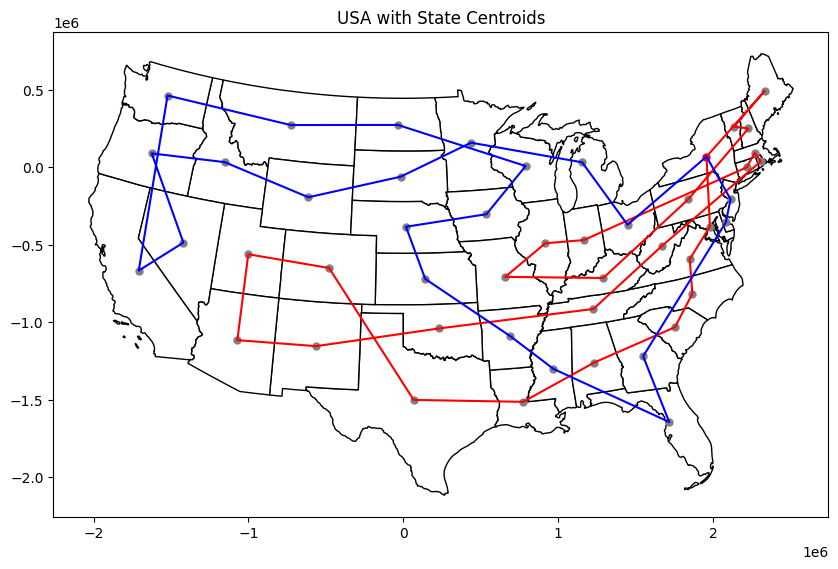

In [21]:
usa_tour_pair = random_tour_pair(48)


country,state_tuples = get_state_centroids()
new_york_index = [y[0] for y in state_tuples].index('New York')
#fix this bottom one

coor = [(x,y) for _,x,y in state_tuples]

pos = pd.DataFrame({
        "x" : [x for x, _ in coor],
        "y" : [y for _, y in coor]
    })
for state_pos in range(len(state_tuples)):
  print (f"position :{state_pos}, state: {state_tuples[state_pos][0]}");
dist = squareform(pdist(pos))
#insert 15 (New York) into both tour pair lists
if 15 in usa_tour_pair[0]:
  usa_tour_pair[0].remove(15)
  usa_tour_pair[0].insert(0,15)
  usa_tour_pair[1].insert(0,15)
else:
  usa_tour_pair[1].remove(15)
  usa_tour_pair[0].insert(0,15)
  usa_tour_pair[1].insert(0,15)

#print("US")
#print(usa_tour_pair)
usa_tsp = pos, dist #create the tsp
usa_tsp = ({"pos": pos, "dist": dist})

#print(usa_tsp['pos'])
#print()
#print(usa_tsp['dist'])


new_tour_pair,moves = stochastic_hill_climb_usa(usa_tsp,usa_tour_pair,15)
print(new_tour_pair)

show_2tsp_usa(state_tuples,usa_tsp,pos,new_tour_pair)


